### Loading Datasets

In [ ]:
import re
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 700)
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = shuffle(pd.read_json('is_train.json'), random_state=0)
val = shuffle(pd.read_json('is_val.json'), random_state=0)
test = pd.read_json('is_test.json')
oos_train = pd.read_json('oos_train.json')
oos_val = pd.read_json('oos_val.json')
oos_test = pd.read_json('oos_test.json')

files = [
         (train,'train'),
         (val,'val'),
         (test,'test'),
         (oos_train,'oos_train'),
         (oos_val,'oos_val'),
         (oos_test,'oos_test')
         ]
         
for file,name in files:
    file.columns = ['text','intent']
    print(f'{name} shape:{file.shape}, {name} has {train.isna().sum().sum()} null values')
in_train = train.copy()

train shape:(15000, 2), train has 0 null values
val shape:(3000, 2), val has 0 null values
test shape:(4500, 2), test has 0 null values
oos_train shape:(100, 2), oos_train has 0 null values
oos_val shape:(100, 2), oos_val has 0 null values
oos_test shape:(1000, 2), oos_test has 0 null values


In [ ]:
in_train = pd.concat([in_train, oos_train], axis=0).reset_index(drop=True)
val = pd.concat([val, oos_val], axis=0).reset_index(drop=True)
test = pd.concat([test, oos_test], axis=0).reset_index(drop=True)

In [ ]:
in_train = shuffle(in_train , random_state=0).reset_index(drop=True)
val = shuffle(val, random_state=0).reset_index(drop=True)
test = shuffle(test, random_state=0).reset_index(drop=True)

In [ ]:
in_train.shape

(15100, 2)

In [ ]:
in_train

,text,intent
0,is it possible for you to use the whisper voice,whisper_mode
1,search for a macaroni and cheese recipe,recipe
2,correct,yes
3,"my card got scratched badly, can you tell my b...",damaged_card
4,i'd like to know what my credit rating is,credit_score
...,...,...
15095,please play come as you are by nirvana,play_music
15096,"book a hotel in pa, harrisburg for the 10th to...",book_hotel
15097,what kind of mpg does this car get in the city,mpg
15098,roll dice,roll_dice


In [ ]:
in_train.intent.value_counts()

change_language              100
meeting_schedule             100
cook_time                    100
order                        100
pin_change                   100
taxes                        100
pay_bill                     100
improve_credit_score         100
recipe                       100
application_status           100
cancel_reservation           100
lost_luggage                 100
international_fees           100
who_do_you_work_for          100
oil_change_how               100
restaurant_reservation       100
fun_fact                     100
flight_status                100
report_lost_card             100
calories                     100
change_accent                100
next_holiday                 100
change_ai_name               100
how_busy                     100
exchange_rate                100
change_volume                100
no                           100
car_rental                   100
calendar_update              100
travel_suggestion            100
oil_change

In [ ]:
in_train['intent'].nunique(), val['intent'].nunique(), test['intent'].nunique()

(151, 151, 151)

In [ ]:
# oss_plus_train = pd.concat([in_train, oos_train],axis=0).reset_index(drop=True)
# oss_plus_val = pd.concat([val,oos_val],axis=0).reset_index(drop=True)
# oss_plus_test = pd.concat([test,oos_test],axis=0).reset_index(drop=True)

In [ ]:
# oss_plus_train['intent'].nunique(), oss_plus_val['intent'].nunique(), oss_plus_test['intent'].nunique()

In [ ]:
# def binarize(df):
#     df.intent = np.where(df.intent!='oos',0,1)
#     return df

In [ ]:
# oos_plus_train = binarize(pd.concat([in_train,oos_train],axis=0).reset_index(drop=True))
# oos_plus_val = binarize(pd.concat([val,oos_val],axis=0).reset_index(drop=True))
# oos_plus_test = binarize(pd.concat([test,oos_test],axis=0).reset_index(drop=True))

In [ ]:
# oos_count = oos_plus_train.intent.value_counts()
# oos_count

In [ ]:
# oss_plus_train.head()

In [ ]:
from sklearn.preprocessing import LabelBinarizer
labelBinary = LabelBinarizer()
 
labels = labelBinary.fit_transform(in_train['intent'])
text = in_train['text']
# import numpy as np
# val = [
#        [0, 0, 1],
#        [1, 0, 0]
# ]
 
# lb.inverse_transform(np.asarray(val))

In [ ]:
labelBinary.classes_

array(['accept_reservations', 'account_blocked', 'alarm',
       'application_status', 'apr', 'are_you_a_bot', 'balance',
       'bill_balance', 'bill_due', 'book_flight', 'book_hotel',
       'calculator', 'calendar', 'calendar_update', 'calories', 'cancel',
       'cancel_reservation', 'car_rental', 'card_declined', 'carry_on',
       'change_accent', 'change_ai_name', 'change_language',
       'change_speed', 'change_user_name', 'change_volume',
       'confirm_reservation', 'cook_time', 'credit_limit',
       'credit_limit_change', 'credit_score', 'current_location',
       'damaged_card', 'date', 'definition', 'direct_deposit',
       'directions', 'distance', 'do_you_have_pets', 'exchange_rate',
       'expiration_date', 'find_phone', 'flight_status', 'flip_coin',
       'food_last', 'freeze_account', 'fun_fact', 'gas', 'gas_type',
       'goodbye', 'greeting', 'how_busy', 'how_old_are_you',
       'improve_credit_score', 'income', 'ingredient_substitution',
       'ingredients_l

In [ ]:
import pickle

labelpath = 'label-151.pkl'
with open(labelpath, 'wb') as handle:
    pickle.dump(labelBinary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(labels.shape, text.shape)

(15100, 151) (15100,)


In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### Transform validation dataset

In [ ]:
val.head()

,text,intent
0,how much do i need to pay in tax,taxes
1,forget reservation at longhorn for 4,cancel_reservation
2,is rice bad after 3 days in fridge,food_last
3,i want to change your name to sarah,change_ai_name
4,what do i get paid,income


In [ ]:
val_labels = labelBinary.transform(val['intent'])
val_text = val['text']

In [ ]:
val_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### **Download & Load Word Vectors for Embedding (Glove)**

* *Download and extract word vectors Glove*

In [ ]:
# %%time

import zipfile
!wget http://nlp.stanford.edu/data/glove.840B.300d.zip
zip_file = zipfile.ZipFile('glove.840B.300d.zip')
zip_file.extractall()

--2022-01-05 07:49:27--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2022-01-05 07:49:27--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2022-01-05 07:49:27--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

* *Load Word vectors in memory*

In [ ]:
%%time

from tqdm.notebook import tqdm
import numpy as np 
 
def get_coefs(word, *arr):
    try:
        return word, np.asarray(arr, dtype='float32')
    except:
        return None, None

embedding_path = '/content/drive/MyDrive/glove.840B.300d.txt'
embeddings_index = dict(get_coefs(*o.strip().split()) for o in tqdm(open(
    embedding_path)))
 
embed_size=300
 
for k in tqdm(list(embeddings_index.keys())):
    v = embeddings_index[k]
    try:
        if v.shape != (embed_size, ):
            embeddings_index.pop(k)
    except:
        pass
 
if None in embeddings_index:
  embeddings_index.pop(None)
  
values = list(embeddings_index.values())
all_embs = np.stack(values)
 
emb_mean, emb_std = all_embs.mean(), all_embs.std()

0it [00:00, ?it/s]

  0%|          | 0/2195885 [00:00<?, ?it/s]

CPU times: user 3min 1s, sys: 16.1 s, total: 3min 17s
Wall time: 3min 19s


### **Tokenizing the Dataset using keras**



* *Read the train and test file from directory and split the train dataset in train test split*

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
 
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
 
from tensorflow.keras.layers import Input, Dense, Embedding, Conv1D, Conv2D, MaxPooling1D, MaxPool2D
from tensorflow.keras.layers import Reshape, Flatten, Dropout, Concatenate
from tensorflow.keras.layers import SpatialDropout1D, concatenate
from tensorflow.keras.layers import GRU,LSTM,Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import TimeDistributed
 
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import Adam
 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#### **Save Keras Tokenizer**

In [ ]:
text.map(len).max()

136

In [ ]:
%%time
MAX_NB_WORDS = 10000
# tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(text)

CPU times: user 216 ms, sys: 733 µs, total: 217 ms
Wall time: 217 ms


In [ ]:
%%time
train_sequences = tokenizer.texts_to_sequences(text)

CPU times: user 367 ms, sys: 2.67 ms, total: 370 ms
Wall time: 372 ms


In [ ]:
train_sequences[:3]

[[10, 24, 257, 8, 5, 2, 75, 4, 211, 188],
 [664, 8, 7, 665, 27, 584, 283],
 [536]]

In [ ]:
print(text[0], train_sequences[0])

is it possible for you to use the whisper voice [10, 24, 257, 8, 5, 2, 75, 4, 211, 188]


In [ ]:
def FindMaxLength(lst): 
    maxList = max(lst, key = lambda i: len(i)) 
    maxLength = len(maxList) 
    return maxLength

MAX_LENGTH = FindMaxLength(train_sequences)

In [ ]:
print(MAX_LENGTH)

28


* Now the Sentences are mapped to lists of integers. However, we still cannot stack them together in a matrix since they have different lengths.
Hopefully Keras allows to **pad** sequences with **0s** to a maximum length. We'll set this length to 425.

In [ ]:
%%time
padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH)

CPU times: user 79.6 ms, sys: 0 ns, total: 79.6 ms
Wall time: 83.6 ms


In [ ]:
%%time
padded_train_sequences

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


array([[  0,   0,   0, ...,   4, 211, 188],
       [  0,   0,   0, ...,  27, 584, 283],
       [  0,   0,   0, ...,   0,   0, 536],
       ...,
       [  0,   0,   0, ...,  15,   4, 303],
       [  0,   0,   0, ...,   0, 165, 221],
       [  0,   0,   0, ...,   6,  22, 210]], dtype=int32)

In [ ]:
%%time
padded_train_sequences.shape

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 8.82 µs


(15100, 28)

In [ ]:
import pickle
 
with open('token-28.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### **Use Saved keras tokenizer**

In [ ]:
import pickle
cat_token = 'token-28.pkl'
with open(cat_token, 'rb') as handle:
    load_token = pickle.load(handle)

In [ ]:
text[2]

'correct'

In [ ]:
# MAX_LENGTH = 28
train_sequences = load_token.texts_to_sequences(text)
padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH)

# padding val
val_sequences = load_token.texts_to_sequences(val_text)
padded_val_sequences = pad_sequences(val_sequences, maxlen=MAX_LENGTH)

In [ ]:
padded_train_sequences.shape

(15100, 28)

In [ ]:
padded_val_sequences.shape

(3100, 28)

### **Training Model using Glove Embedding while using RNN & CNN**

In [ ]:
%%time
# MAX_NB_WORDS = 2600
word_index = load_token.word_index
nb_words = MAX_NB_WORDS
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
 
oov = 0
for word, i in tqdm(word_index.items()):
    if i >= MAX_NB_WORDS: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        oov += 1
 
print(oov)

  0%|          | 0/5350 [00:00<?, ?it/s]

340
CPU times: user 208 ms, sys: 11 ms, total: 219 ms
Wall time: 233 ms


* Loading the Layers and Embedding

In [ ]:
len(labels[0])

151

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
len(val_labels[0])

151

In [ ]:
LABEL_VALUES = labels
LABEL_LEN = len(labels[0])
# MAX_LENGTH = 1155
# MAX_NB_WORDS = 1170

In [ ]:
LABEL_LEN

151

In [ ]:
%%time
from tensorflow.keras.regularizers import l2

def get_rnn_cnn_model():
    embedding_dim = 300
    inp = Input(shape=(MAX_LENGTH, ))
    x = Embedding(MAX_NB_WORDS, embedding_dim, weights=[embedding_matrix], input_length=MAX_LENGTH, trainable=True)(inp)
    x = SpatialDropout1D(0.3)(x)
    x = Bidirectional(GRU(100, return_sequences=True))(x)
    # x = Bidirectional(LSTM(100, return_sequences=True))(x)
    # x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_initializer = "he_uniform")(x)
    x = Conv1D(64, kernel_size = 2, padding = "valid", kernel_regularizer=l2(0.0005))(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    conc = concatenate([avg_pool, max_pool])
    outp = Dense(LABEL_LEN, activation="softmax")(conc)
    model = Model(inputs=inp, outputs=outp)
    optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

rnn_cnn_model = get_rnn_cnn_model()

CPU times: user 1.1 s, sys: 3.79 s, total: 4.89 s
Wall time: 5.44 s


* **Training and Saving the Model**

* *change mode to min if we are going to monitor the loss*
* *If we don't want to use validation data for whatever be the reason and implement check pointing, we have to change the ModelCheckpoint to work based on monitor='acc'*
* We have to fit validation data like this validation_data=(X_valid, y_valid),

In [ ]:
filepath = 'oos_model.h5'
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
 
# batch size factor of 4,8,16,32
BATCH_SIZE = 256
epochs = 100

In [ ]:
history = rnn_cnn_model.fit(padded_train_sequences, 
                    LABEL_VALUES, 
                    # validation_split = 0.1, #0.1
                    validation_data=(padded_val_sequences, val_labels), 
                    batch_size=BATCH_SIZE, 
                    callbacks=[checkpoint,
                               tensorflow.keras.callbacks.EarlyStopping(
                                   monitor='val_accuracy', patience=3)], 
                    epochs=epochs, 
                    verbose=1,
                    shuffle=True)

Epoch 1/100
59/59 [==============================] - ETA: 0s - loss: 4.7620 - accuracy: 0.0723
Epoch 00001: val_accuracy improved from -inf to 0.22806, saving model to oos_model.h5
59/59 [==============================] - 24s 66ms/step - loss: 4.7620 - accuracy: 0.0723 - val_loss: 4.0045 - val_accuracy: 0.2281
Epoch 2/100
59/59 [==============================] - ETA: 0s - loss: 2.6051 - accuracy: 0.4643
Epoch 00002: val_accuracy improved from 0.22806 to 0.66065, saving model to oos_model.h5
59/59 [==============================] - 2s 39ms/step - loss: 2.6051 - accuracy: 0.4643 - val_loss: 1.5416 - val_accuracy: 0.6606
Epoch 3/100
59/59 [==============================] - ETA: 0s - loss: 0.9338 - accuracy: 0.7919
Epoch 00003: val_accuracy improved from 0.66065 to 0.79968, saving model to oos_model.h5
59/59 [==============================] - 2s 40ms/step - loss: 0.9338 - accuracy: 0.7919 - val_loss: 0.9132 - val_accuracy: 0.7997
Epoch 4/100
59/59 [==============================] - ETA: 0s

### **Loading the Tokenizer and Model**

In [ ]:
from keras.models import load_model
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import pickle

In [ ]:
modelPath = 'oos_model.h5'
tokenPath = 'token-28.pkl'
labelPath = '/content/label-151.pkl'

In [ ]:
loadModel= load_model(modelPath)

with open(tokenPath, 'rb') as handle:
    loadToken = pickle.load(handle)

with open(labelPath, 'rb') as handle:
    loadLabel = pickle.load(handle)


In [ ]:
LABEL = loadLabel.classes_

In [ ]:
LABEL

array(['accept_reservations', 'account_blocked', 'alarm',
       'application_status', 'apr', 'are_you_a_bot', 'balance',
       'bill_balance', 'bill_due', 'book_flight', 'book_hotel',
       'calculator', 'calendar', 'calendar_update', 'calories', 'cancel',
       'cancel_reservation', 'car_rental', 'card_declined', 'carry_on',
       'change_accent', 'change_ai_name', 'change_language',
       'change_speed', 'change_user_name', 'change_volume',
       'confirm_reservation', 'cook_time', 'credit_limit',
       'credit_limit_change', 'credit_score', 'current_location',
       'damaged_card', 'date', 'definition', 'direct_deposit',
       'directions', 'distance', 'do_you_have_pets', 'exchange_rate',
       'expiration_date', 'find_phone', 'flight_status', 'flip_coin',
       'food_last', 'freeze_account', 'fun_fact', 'gas', 'gas_type',
       'goodbye', 'greeting', 'how_busy', 'how_old_are_you',
       'improve_credit_score', 'income', 'ingredient_substitution',
       'ingredients_l

In [ ]:
len(LABEL)

151

### **Testing**

In [ ]:
# oss_plus_val.head()

In [ ]:
# test = pd.read_csv('/content/test.tsv', sep='\t')

In [ ]:
test

,text,intent
0,i would like to do some things in phoenix,travel_suggestion
1,what are the steps to rollover my 401k,rollover_401k
2,what films are in the running for best song at...,oos
3,will you tell me how the ai is doing,greeting
4,how would i say what is your name if i were fr...,translate
...,...,...
5495,what time is a star is born showing,oos
5496,need to know the weather now,weather
5497,tell me nutritional info for burger,nutrition_info
5498,what is the timeframe for getting my tires cha...,tire_change


In [ ]:
test.shape

(5500, 2)

In [ ]:
test_label = test['intent'].values
sentence = test['text'].values

In [ ]:
# tokenization
maxLength = 28
test_sequences = loadToken.texts_to_sequences(sentence)
padded_test_sequences = pad_sequences(test_sequences, maxlen=maxLength)

In [ ]:
# predection
pred_ls = loadModel.predict(padded_test_sequences)
# print(type(pred_ls))
category = loadLabel.inverse_transform(pred_ls)
# score = ('{:.2f}'.format(round(np.max(pred_ls), 2)*100))

In [ ]:
pred_ls

array([[9.2511791e-06, 1.9787474e-10, 6.8441426e-09, ..., 4.3683452e-09,
        7.7619366e-10, 4.8828091e-15],
       [3.0184139e-10, 1.0303477e-07, 2.5443482e-11, ..., 4.8036636e-10,
        1.5961625e-07, 5.6372382e-13],
       [1.0861066e-05, 1.9428160e-07, 1.3370811e-05, ..., 1.6753489e-05,
        1.8590594e-04, 1.6000612e-07],
       ...,
       [1.2201089e-07, 1.9129483e-10, 4.6167055e-12, ..., 1.2736726e-08,
        8.8295269e-07, 6.0660137e-11],
       [9.8403351e-12, 3.1148082e-09, 1.2534829e-06, ..., 5.8524567e-08,
        1.1706497e-08, 4.5826060e-10],
       [1.4371895e-07, 1.4527260e-06, 5.5210989e-16, ..., 2.9916063e-09,
        2.3958079e-13, 1.4989715e-14]], dtype=float32)

In [ ]:
# score = []
# for i in pred_ls:
#   score.append(np.max(pred_ls)*100)

In [ ]:
category

array(['travel_suggestion', 'rollover_401k', 'oos', ..., 'nutrition_info',
       'tire_pressure', 'credit_limit'], dtype='<U25')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

# DeepAlingned : NMI: 93.86, ARI: 79.75, ACC: 86.49 
print('ACC : ', round(accuracy_score(test_label, category)*100, 2))
print('ARI : ', round(adjusted_rand_score(test_label, category)*100, 2))
print('NMI : ', round(normalized_mutual_info_score(test_label, category)*100, 2))

ACC :  77.22
ARI :  19.48
NMI :  82.52


In [ ]:
# result = []
# for i in pred_ls:
#     if i > 0.5:
#         result.append(1)
#     else:
#         result.append(0)

### **Accuracy, ROC AUC, Confusion Matrix and Classification Report**

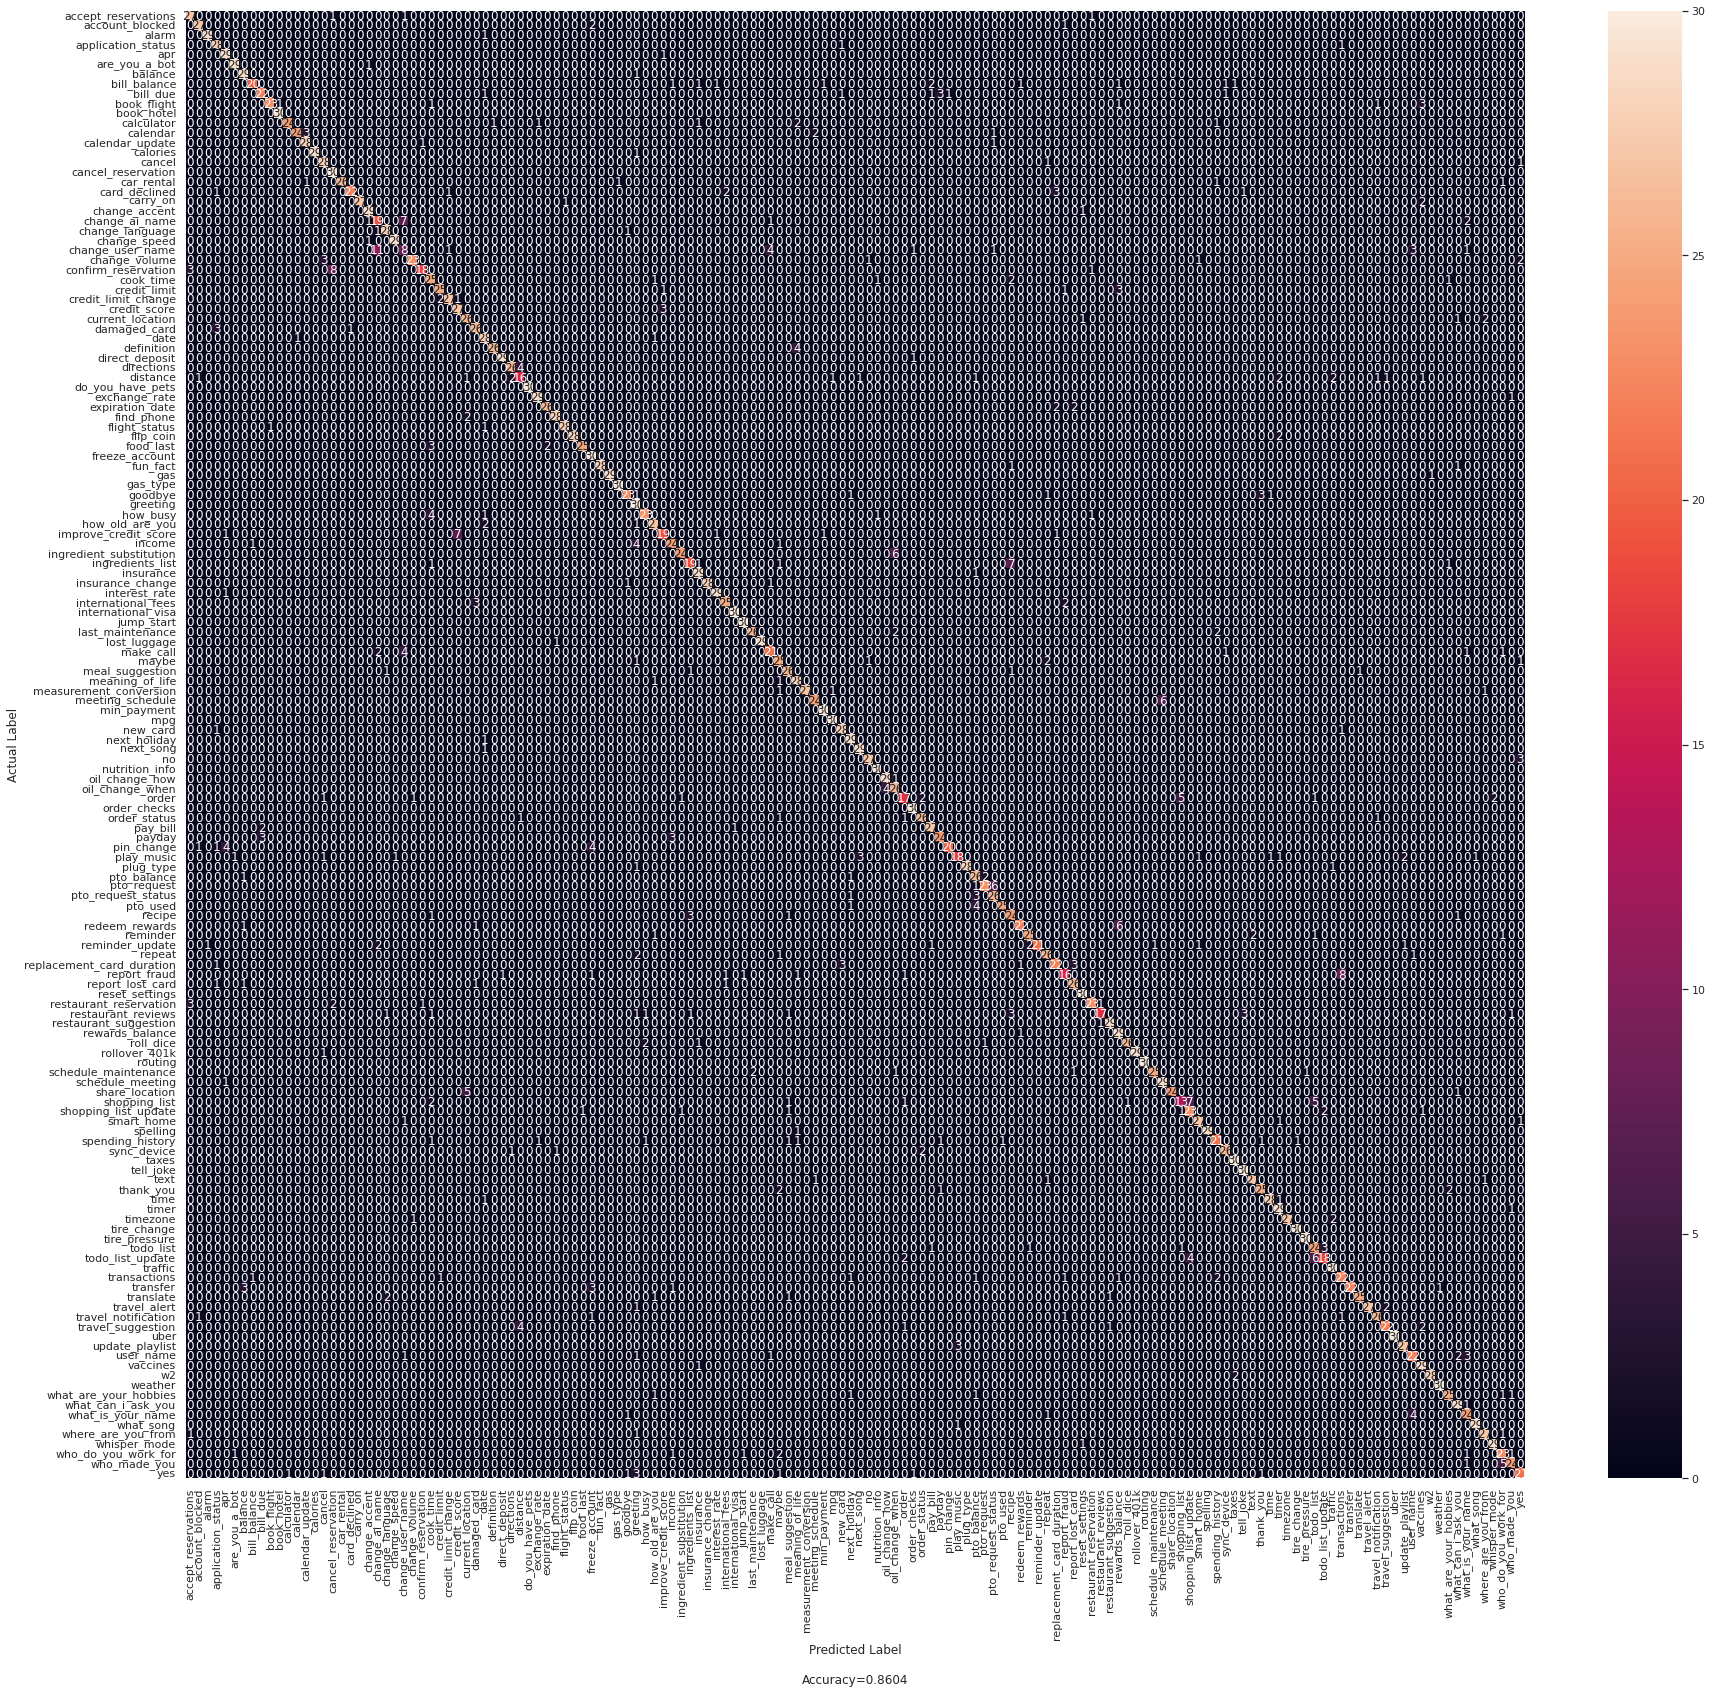

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(rc={'figure.facecolor':'white'})

# input values
TEST_LABEL = test_label
PREDICTED_LABEL = category
labels = LABEL

# accuracy = accuracy_score(TEST_LABEL, PREDICTED_LABEL)
# conf_mat = confusion_matrix(TEST_LABEL, PREDICTED_LABEL)
# fig, ax = plt.subplots(figsize=(30,27))
# sns.heatmap(conf_mat, annot=True, fmt='d',
#             xticklabels=labels, yticklabels=labels)
# plt.ylabel('Actual Label')
# # plt.xlabel('Predicted Label\n\nAccuracy={:0.4f}; ROC AUC={:0.4f}'.format(accuracy, roc_score))
# plt.xlabel('Predicted Label\n\nAccuracy={:0.4f}'.format(accuracy))
# # plt.savefig('/content/drive/My Drive/Lafarge/Model/Hardware/HardwareModel-Confusion-v1.5.jpg')
# # plt.savefig('HardwareModel-Confusion-v1.5.jpg')
# plt.xticks(rotation=90)
# plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_label, category, target_names=LABEL))

                           precision    recall  f1-score   support

      accept_reservations       0.96      0.90      0.93        30
          account_blocked       0.76      0.93      0.84        30
                    alarm       0.88      1.00      0.94        30
       application_status       0.97      1.00      0.98        30
                      apr       0.88      1.00      0.94        30
            are_you_a_bot       0.69      0.97      0.81        30
                  balance       0.62      0.97      0.75        30
             bill_balance       0.68      0.77      0.72        30
                 bill_due       0.68      0.87      0.76        30
              book_flight       0.91      1.00      0.95        30
               book_hotel       0.94      0.97      0.95        30
               calculator       0.69      0.90      0.78        30
                 calendar       0.92      0.77      0.84        30
          calendar_update       0.88      0.93      0.90     